# Speech Emotion Recognition
## Model Training
Goal: Train and evaluate machine learning models (XGBoost & Random Forest) to classify emotions from speech features.

---

### Load & Explore Extracted Features
We begin by loading the feature dataset created in the previous step and doing a quick sanity check.

--- 

### Import Required Libraries
We use:
- sklearn for preprocessing, training, and evaluation
- imblearn for oversampling
- xgboost and randomforest models
- joblib for saving trained models
- seaborn & matplotlib for confusion matrix visualization

---

### Model 1: XGBoost Classifier
1. Load Dataset
2. Encode Labels
3. Handle Class Imbalance
4. Train Test Split
5. Train XGBoost Model
6. Evaluate XGBoost
7. Save model

---


C:\Users\anany\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Classification Report:

              precision    recall  f1-score   support

       angry       0.63      0.63      0.63        38
        calm       0.76      0.76      0.76        38
     disgust       0.58      0.64      0.61        39
     fearful       0.55      0.56      0.56        39
       happy       0.59      0.62      0.60        39
     neutral       0.73      0.92      0.81        38
         sad       0.59      0.44      0.50        39
   surprised       0.77      0.63      0.70        38

    accuracy                           0.65       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.65      0.65      0.65       308



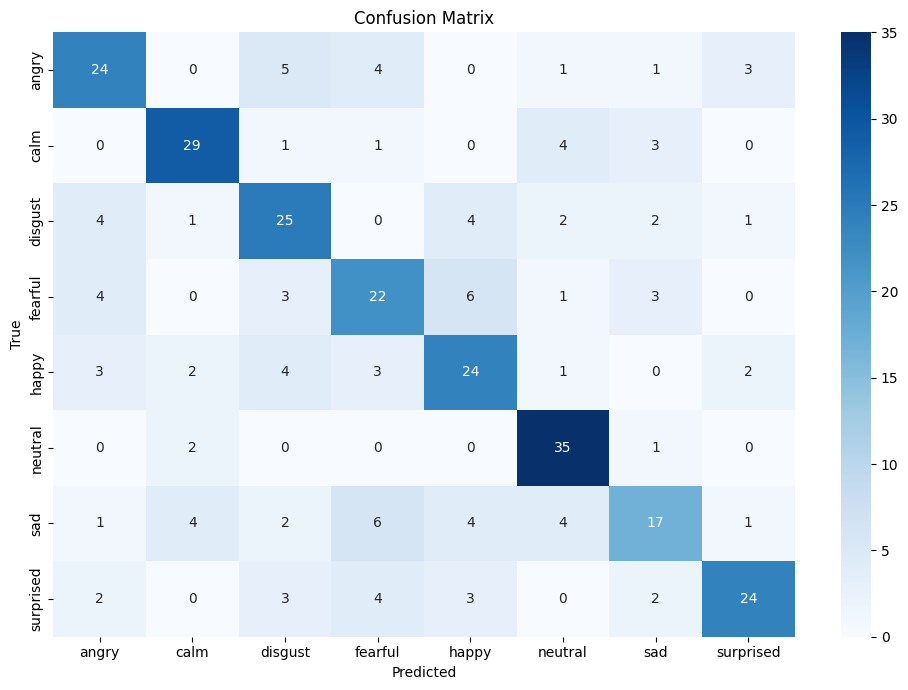

✅ Model saved as emotion_model.pkl


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# 1. Load dataset
# -----------------------
df = pd.read_csv("outputs/features.csv")
X = df.drop("label", axis=1)
y = df["label"]

# -----------------------
# 2. Encode labels
# -----------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, "streamlit_app/label_encoder.pkl")

# -----------------------
# 3. Oversample to fix class imbalance
# -----------------------
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_encoded)

# -----------------------
# 4. Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# -----------------------
# 5. Train XGBoost model with better params
# -----------------------
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    gamma=0.3,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_alpha=0.01,
    reg_lambda=1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# -----------------------
# 6. Evaluate
# -----------------------
y_pred = model.predict(X_test)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# -----------------------
# 7. Save model
# -----------------------
joblib.dump(model, "streamlit_app/emotion_model.pkl")
print("✅ Model saved as emotion_model.pkl")

In [4]:
import pandas as pd

df = pd.read_csv("outputs/features.csv")  
print(df.shape)


(1440, 44)


### Model 2: Random Forest Classifier
1. Reload+ Prepare Data
2. Encode Labels
3. Handle Class Imbalance + Scale Features
4. Train-Test Split
5. Train Random Forest
6. Evaluate Random Forest
7. Save Random Forest Model

✅ Random Forest Classification Report:

              precision    recall  f1-score   support

       angry       0.68      0.61      0.64        38
        calm       0.65      0.79      0.71        38
     disgust       0.55      0.62      0.58        39
     fearful       0.58      0.56      0.57        39
       happy       0.71      0.62      0.66        39
     neutral       0.74      0.92      0.82        38
         sad       0.59      0.41      0.48        39
   surprised       0.71      0.71      0.71        38

    accuracy                           0.65       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.65      0.65      0.65       308



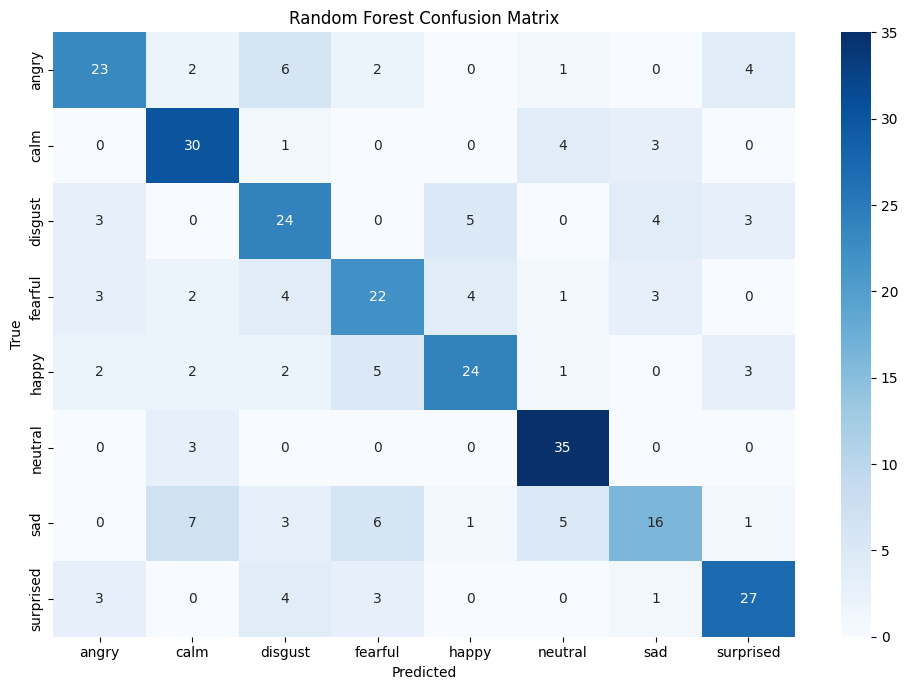

✅ Model + scaler saved to streamlit_app/


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# -----------------------------
# Load and prepare data
# -----------------------------
df = pd.read_csv("outputs/features.csv")
X = df.drop("label", axis=1)
y = df["label"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, "streamlit_app/label_encoder.pkl")

# Oversample
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
joblib.dump(scaler, "streamlit_app/scaler.pkl")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# -----------------------------
# Train Random Forest
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=50,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42
)
rf_model.fit(X_train, y_train)

# -----------------------------
# Evaluate
# -----------------------------
rf_preds = rf_model.predict(X_test)
print("✅ Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# -----------------------------
# Save Model
# -----------------------------
joblib.dump(rf_model, "streamlit_app/emotion_rf_model.pkl")
print("✅ Model + scaler saved to streamlit_app/")


### Overall Performance

| Metric            | XGBoost        | Random Forest   |
|-------------------|----------------|-----------------|
| **Accuracy**      | 65%            | 65%             |
| **Macro F1-Score**| 0.65           | 0.65            |
| **Weighted Avg F1** | 0.65         | 0.65            |

---

## Class-wise Highlights

| Emotion   | XGBoost F1 | Random Forest F1 | Comment                              |
|-----------|------------|------------------|--------------------------------------|
| Angry     | 0.64       | 0.63             | Similar performance                  |
| Calm      | 0.71       | 0.76             | Slightly better in RF                |
| Disgust   | 0.58       | 0.61             | RF performs slightly better          |
| Fearful   | 0.57       | 0.56             | Comparable                           |
| Happy     | 0.66       | 0.60             | XGBoost outperforms RF               |
| Neutral   | 0.82       | 0.81             | Both perform very well               |
| Sad       | 0.48       | 0.50             | Poor performance in both models      |
| Surprised | 0.71       | 0.70             | Slight edge to XGBoost               |

---

## Key Observations

- Both models achieve **~65% overall accuracy** with balanced class-wise performance.
- **Neutral** emotion is the most accurately predicted class in both models (F1 > 0.8).
- **Sad** emotion is consistently the hardest to classify (F1 < 0.5).
- Class imbalance was addressed using **RandomOverSampler**.
- XGBoost slightly outperforms in *Happy* and *Surprised*, while RF performs better on *Calm* and *Disgust*.

---

## Artifacts Saved
- `emotion_model.pkl` – Trained XGBoost model
- `emotion_rf_model.pkl` – Trained Random Forest model
- `label_encoder.pkl` – Label encoder for emotion classes
- `scaler.pkl` – Standard scaler (used in RF pipeline)

---